In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
import io
import requests

dataset_name = 'demographic'
api_url = f'http://localhost:8000/api/datasets/{dataset_name}'
local_path = f'../public/datasets/{dataset_name}_full.csv'

try:
    print(f'Attempting to fetch data from API: {api_url}')
    response = requests.get(api_url)
    response.raise_for_status()
    df = pd.read_csv(io.StringIO(response.text))
    print('Successfully loaded data from API')
except Exception as e:
    print(f'API unavailable or failed ({e}). Falling back to local CSV: {local_path}')
    try:
        df = pd.read_csv(local_path, on_bad_lines='skip', low_memory=False)
        print('Successfully loaded data from local CSV')
    except FileNotFoundError:
        print(f'Error: Local file {local_path} not found. Please ensure data is synced.')
        # Create empty dataframe as fallback to prevent crash
        df = pd.DataFrame()


In [5]:
df.shape

(2375882, 6)

In [6]:
df.columns

Index(['date', 'state', 'district', 'pincode', 'demo_age_5_17',
       'demo_age_17_'],
      dtype='object')

In [7]:
df['state'].unique()

array(['West Bengal', 'Manipur', 'Rajasthan', 'Himachal Pradesh',
       'Telangana', 'Kerala', 'Uttar Pradesh', 'Madhya Pradesh', 'Bihar',
       'Karnataka', 'Maharashtra', 'Punjab', 'Gujarat', 'Assam',
       'Haryana', 'Tamil Nadu', 'Odisha', 'Arunachal Pradesh',
       'Andhra Pradesh', 'Uttarakhand', 'Mizoram', 'Chhattisgarh',
       'Jharkhand', 'Jammu and Kashmir', 'Delhi', 'Goa', 'Tripura',
       'Chandigarh', 'Sikkim', 'Nagaland', 'Meghalaya', 'Puducherry',
       'Ladakh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Andaman and Nicobar Islands', 'Daman and Diu',
       'Dadra and Nagar Haveli', 'Jammu & Kashmir', 'Lakshadweep',
       'Andaman & Nicobar Islands', 'West bengal', 'odisha', 'Orissa',
       'Pondicherry', 'Dadra & Nagar Haveli', 'Daman & Diu', 'ODISHA',
       'Westbengal', 'andhra pradesh', 'West  Bengal', 'West Bangal',
       'west Bengal', 'WEST BENGAL', 'WESTBENGAL', 'Chhatisgarh',
       'Uttaranchal', 'West Bengli', 'PUTHUR', 'Madanapalle', 'Nag

In [8]:
df['state'].nunique()

70

In [9]:
df['district'].unique()

array(['Murshidabad', 'Thoubal', 'Sirohi', 'Hooghly', 'Una', 'Sangareddy',
       'Kannur', 'Jaipur', 'Varanasi', 'Budaun', 'Tikamgarh', 'Fatehpur',
       'Supaul', 'Ramanagar', 'Thiruvananthapuram', 'Mandsaur',
       'Pilibhit', 'Buldhana', 'Fatehgarh Sahib', 'Ratlam', 'Gandhinagar',
       'Samastipur', 'Indore', 'Gwalior', 'Kollam', 'Siwan', 'Goalpara',
       'Yamuna Nagar', 'Tiruvannamalai', 'Nirmal', 'Rajkot', 'Kachchh',
       'Mayurbhanj', 'Papum Pare', 'Jalandhar', 'N. T. R', 'Nalbari',
       'Nashik', 'Palghar', 'Vizianagaram', 'Dharwad', 'Almora',
       'Jaisalmer', 'Nagpur', 'Kalaburagi', 'Kolkata', 'Nagaur', 'Kolar',
       'Tiruvallur', 'Puri', 'Deoria', 'Agar Malwa', 'Belgaum', 'Navsari',
       'Mamit', 'Hanumakonda', 'Jodhpur', 'Balaghat', 'Sikar',
       'Udham Singh Nagar', 'Bara Banki', 'Nadia', 'Nalanda',
       'Perambalur', 'Harda', 'Panchmahals', 'Thanjavur', 'Tumkur',
       'Rajanna Sircilla', 'Ganjam', 'Anantapur', 'Rangareddi', 'Y. S. R',
       'Chengal

In [10]:
df.columns

Index(['date', 'state', 'district', 'pincode', 'demo_age_5_17',
       'demo_age_17_'],
      dtype='object')

In [11]:
df.shape

(2375882, 6)

In [12]:
# Standard list of Indian States and Union Territories (as per GoI)
STANDARD_STATES_UTS = {
    "Andhra Pradesh",
    "Arunachal Pradesh",
    "Assam",
    "Bihar",
    "Chhattisgarh",
    "Goa",
    "Gujarat",
    "Haryana",
    "Himachal Pradesh",
    "Jharkhand",
    "Karnataka",
    "Kerala",
    "Madhya Pradesh",
    "Maharashtra",
    "Manipur",
    "Meghalaya",
    "Mizoram",
    "Nagaland",
    "Odisha",
    "Punjab",
    "Rajasthan",
    "Sikkim",
    "Tamil Nadu",
    "Telangana",
    "Tripura",
    "Uttar Pradesh",
    "Uttarakhand",
    "West Bengal",
    # Union Territories
    "Andaman And Nicobar Islands",
    "Chandigarh",
    "Dadra And Nagar Haveli And Daman And Diu",
    "Delhi",
    "Jammu And Kashmir",
    "Ladakh",
    "Lakshadweep",
    "Puducherry"
}


In [13]:
#Text standardization
df["state"] = (
    df["state"]
    .astype(str)
    .str.strip()
    .str.title()
)

df["district"] = (
    df["district"]
    .astype(str)
    .str.strip()
    .str.title()
)

df["pincode"] = df["pincode"].astype(str).str.strip()


In [14]:
df["state"].unique()

array(['West Bengal', 'Manipur', 'Rajasthan', 'Himachal Pradesh',
       'Telangana', 'Kerala', 'Uttar Pradesh', 'Madhya Pradesh', 'Bihar',
       'Karnataka', 'Maharashtra', 'Punjab', 'Gujarat', 'Assam',
       'Haryana', 'Tamil Nadu', 'Odisha', 'Arunachal Pradesh',
       'Andhra Pradesh', 'Uttarakhand', 'Mizoram', 'Chhattisgarh',
       'Jharkhand', 'Jammu And Kashmir', 'Delhi', 'Goa', 'Tripura',
       'Chandigarh', 'Sikkim', 'Nagaland', 'Meghalaya', 'Puducherry',
       'Ladakh', 'Dadra And Nagar Haveli And Daman And Diu',
       'Andaman And Nicobar Islands', 'Daman And Diu',
       'Dadra And Nagar Haveli', 'Jammu & Kashmir', 'Lakshadweep',
       'Andaman & Nicobar Islands', 'Orissa', 'Pondicherry',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Westbengal',
       'West  Bengal', 'West Bangal', 'Chhatisgarh', 'Uttaranchal',
       'West Bengli', 'Puthur', 'Madanapalle', 'Nagpur', 'Darbhanga',
       'Gurgaon', 'Balanagar', 'Greater Kailash 2', 'Pune City',
       'Puttenahalli

In [15]:
df['state'].nunique()

63

In [18]:
# Official list of Indian States and Union Territories
INDIA_STATES_UT = {
    "Andhra Pradesh", "Arunachal Pradesh", "Assam", "Bihar", "Chhattisgarh",
    "Goa", "Gujarat", "Haryana", "Himachal Pradesh", "Jharkhand",
    "Karnataka", "Kerala", "Madhya Pradesh", "Maharashtra", "Manipur",
    "Meghalaya", "Mizoram", "Nagaland", "Odisha", "Punjab",
    "Rajasthan", "Sikkim", "Tamil Nadu", "Telangana", "Tripura",
    "Uttar Pradesh", "Uttarakhand", "West Bengal",

    # Union Territories
    "Andaman And Nicobar Islands", "Chandigarh",
    "Dadra And Nagar Haveli And Daman And Diu",
    "Delhi", "Jammu And Kashmir", "Ladakh",
    "Lakshadweep", "Puducherry"
}


In [19]:
#Each district has MANY pincodes
df[df['district'] == 'Mahabubnagar'][['district','pincode','state']].drop_duplicates()

,district,pincode,state
429,Mahabubnagar,509340,Telangana
440,Mahabubnagar,509311,Telangana
678,Mahabubnagar,509104,Telangana
701,Mahabubnagar,509206,Telangana
804,Mahabubnagar,509385,Telangana
...,...,...,...
2191659,Mahabubnagar,509131,Andhra Pradesh
2217713,Mahabubnagar,509311,Andhra Pradesh
2240105,Mahabubnagar,509209,Andhra Pradesh
2323870,Mahabubnagar,509201,Andhra Pradesh


In [20]:
district_state_check = (
    df.groupby(['district', 'pincode'])['state']
      .nunique()
      .reset_index()
)

district_state_check['state'].value_counts()


state
1    28786
2     1438
3        9
Name: count, dtype: int64

For 28,786 (district, pincode) pairs
 that pincode appears in ONLY ONE state
1438 rows  Same district + pincode appears in TWO states
9 rows Same pincode is mapped to 3 states

In [21]:
# Find invalid state values
#Values in dataset that are NOT valid states
invalid_states = sorted(
    set(df["state"].unique()) - INDIA_STATES_UT
)

len(invalid_states), invalid_states


(27,
 ['100000',
  '561203',
  'Andaman & Nicobar Islands',
  'Balanagar',
  'Chhatisgarh',
  'Dadra & Nagar Haveli',
  'Dadra And Nagar Haveli',
  'Daman & Diu',
  'Daman And Diu',
  'Darbhanga',
  'Greater Kailash 2',
  'Gurgaon',
  'Jaipur',
  'Jammu & Kashmir',
  'Madanapalle',
  'Nagpur',
  'Orissa',
  'Pondicherry',
  'Pune City',
  'Puthur',
  'Puttenahalli',
  'Raja Annamalai Puram',
  'Uttaranchal',
  'West  Bengal',
  'West Bangal',
  'West Bengli',
  'Westbengal'])

In [22]:
# Flag rows where state is invalid
df["state_needs_correction"] = ~df["state"].isin(INDIA_STATES_UT)

df["state_needs_correction"].value_counts()
df[df["state_needs_correction"] == True]["state"].unique()


array(['Daman And Diu', 'Dadra And Nagar Haveli', 'Jammu & Kashmir',
       'Andaman & Nicobar Islands', 'Orissa', 'Pondicherry',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Westbengal',
       'West  Bengal', 'West Bangal', 'Chhatisgarh', 'Uttaranchal',
       'West Bengli', 'Puthur', 'Madanapalle', 'Nagpur', 'Darbhanga',
       'Gurgaon', 'Balanagar', 'Greater Kailash 2', 'Pune City',
       'Puttenahalli', '100000', 'Raja Annamalai Puram', 'Jaipur',
       '561203'], dtype=object)

In [23]:
df[df["state_needs_correction"]].head(10)


,date,state,district,pincode,demo_age_5_17,demo_age_17_,state_needs_correction
6985,01-03-2025,Daman And Diu,Daman,396210,18,186,True
13471,01-03-2025,Daman And Diu,Daman,396210,18,186,True
16347,01-04-2025,Dadra And Nagar Haveli,Dadra And Nagar Haveli,396230,78,483,True
21014,01-09-2025,Jammu & Kashmir,Jammu,180002,0,2,True
22270,01-09-2025,Dadra And Nagar Haveli,Dadra And Nagar Haveli,396240,8,5,True
22544,01-09-2025,Andaman & Nicobar Islands,South Andaman,744107,0,1,True
22545,01-09-2025,Andaman & Nicobar Islands,South Andaman,744206,0,1,True
24829,01-09-2025,Orissa,Balangir,767030,0,4,True
24830,01-09-2025,Orissa,Balangir,767032,0,4,True
24831,01-09-2025,Orissa,Balangir,767035,0,5,True


In [24]:
df[df["state"] == "Jaipur"].head(10)


,date,state,district,pincode,demo_age_5_17,demo_age_17_,state_needs_correction
2195906,26-12-2025,Jaipur,Near Meera Hospital,302016,0,1,True


In [25]:
df[df["state"]=="Puttenahalli"].head(10)

,date,state,district,pincode,demo_age_5_17,demo_age_17_,state_needs_correction
2040797,19-12-2025,Puttenahalli,5Th Cross,560078,0,1,True


In [26]:
df[df["state"]=="Raja Annamalai Puram"].head(10)

,date,state,district,pincode,demo_age_5_17,demo_age_17_,state_needs_correction
2128634,23-12-2025,Raja Annamalai Puram,Near Dhyana Ashram,600028,0,1,True


In [27]:
df[df["state"]=="Darbhanga"].head(10)

,date,state,district,pincode,demo_age_5_17,demo_age_17_,state_needs_correction
1844225,11-12-2025,Darbhanga,Near University Thana,846004,0,1,True
1956000,16-12-2025,Darbhanga,Near University Thana,846004,0,1,True


In [28]:
df[df["state"]=="Balanagar"].head(10)

,date,state,district,pincode,demo_age_5_17,demo_age_17_,state_needs_correction
1858200,12-12-2025,Balanagar,Idpl Colony,500037,0,1,True


In [29]:
df[df["state"]=="Madanapalle"].head(10)

,date,state,district,pincode,demo_age_5_17,demo_age_17_,state_needs_correction
1548115,29-11-2025,Madanapalle,Kadiri Road,517325,0,1,True
2127468,23-12-2025,Madanapalle,Kadiri Road,517325,0,1,True
2231346,27-12-2025,Madanapalle,Kadiri Road,517325,0,1,True


In [30]:
df[df["state"]=="Nagpur"].head(10)

,date,state,district,pincode,demo_age_5_17,demo_age_17_,state_needs_correction
1630021,03-12-2025,Nagpur,Near Uday Nagar Nit Garden,440024,0,1,True
1634005,03-12-2025,Nagpur,Near Uday Nagar Nit Garden,440024,0,1,True
1894365,13-12-2025,Nagpur,Near Uday Nagar Nit Garden,440024,0,1,True
1905019,14-12-2025,Nagpur,Near Uday Nagar Nit Garden,440024,0,1,True
1910109,14-12-2025,Nagpur,Near Uday Nagar Nit Garden,440024,0,1,True
2091144,22-12-2025,Nagpur,Near Uday Nagar Nit Garden,440024,0,1,True


In [31]:
df[df["state"]=="Andhra Pradesh"].head(10)

,date,state,district,pincode,demo_age_5_17,demo_age_17_,state_needs_correction
35,01-03-2025,Andhra Pradesh,N. T. R,520010,27,319,False
40,01-03-2025,Andhra Pradesh,Vizianagaram,535579,29,485,False
77,01-03-2025,Andhra Pradesh,Anantapur,515556,10,184,False
78,01-03-2025,Andhra Pradesh,Rangareddi,500037,28,161,False
79,01-03-2025,Andhra Pradesh,Y. S. R,516309,10,69,False
96,01-03-2025,Andhra Pradesh,Kurnool,518220,20,240,False
97,01-03-2025,Andhra Pradesh,Ananthapur,515761,52,274,False
101,01-03-2025,Andhra Pradesh,Adilabad,504299,25,528,False
140,01-03-2025,Andhra Pradesh,Sri Sathya Sai,515201,74,374,False
146,01-03-2025,Andhra Pradesh,West Godavari,534166,18,269,False


In [32]:
STATE_ALIASES = {
    "Orissa": "Odisha",
    "West Bengal ": "West Bengal",
    "Westbengal": "West Bengal",
    "West Bengli": "West Bengal",
    "West Bengal.": "West Bengal",

    "Daman & Diu": "Dadra And Nagar Haveli And Daman And Diu",
    "Dadra And Nagar Haveli": "Dadra And Nagar Haveli And Daman And Diu",

    "Pondicherry": "Puducherry",
    "Uttaranchal": "Uttarakhand"
}

df["state"] = df["state"].replace(STATE_ALIASES)


In [33]:
df["state"].nunique()

56

In [34]:
df["state_needs_correction"] = ~df["state"].isin(INDIA_STATES_UT)

df["state_needs_correction"].value_counts()


state_needs_correction
False    2373966
True        1916
Name: count, dtype: int64

In [35]:
#Build PINCODE → STATE mapping
#For each pincode, look at rows where state is already correct.
#Among those, which state appears most frequently for that pincode
pincode_state_map = (
    df[~df["state_needs_correction"]]   # only trusted rows
    .groupby("pincode")["state"]
    .agg(lambda x: x.value_counts().idxmax())
)


In [36]:
def fix_state(row):
    if row["state_needs_correction"]:
        return pincode_state_map.get(row["pincode"], row["state"])
    return row["state"]

df["state"] = df.apply(fix_state, axis=1)


In [37]:
remaining_invalid = set(df["state"].unique()) - INDIA_STATES_UT
remaining_invalid


{'100000'}

In [38]:
set(df["state"].unique())


{'100000',
 'Andaman And Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Dadra And Nagar Haveli And Daman And Diu',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu And Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Lakshadweep',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal'}

In [39]:
df[df["state"]=="100000"].head(10)

,date,state,district,pincode,demo_age_5_17,demo_age_17_,state_needs_correction
2055554,20-12-2025,100000,100000,100000,0,1,True
2120865,23-12-2025,100000,100000,100000,0,1,True


In [40]:
df = df[~df["state"].eq("100000")]


In [41]:
set(df["state"].unique()) - INDIA_STATES_UT


set()

In [42]:
set(df["state"].unique())


{'Andaman And Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Dadra And Nagar Haveli And Daman And Diu',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu And Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Lakshadweep',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal'}

In [43]:
df['state'].nunique()

36

In [44]:
df.isnull().sum()

date                      0
state                     0
district                  0
pincode                   0
demo_age_5_17             0
demo_age_17_              0
state_needs_correction    0
dtype: int64

In [45]:
state_activity = (
    df.groupby("state")[["demo_age_5_17", "demo_age_17_"]]
    .sum()
    .reset_index()
)

# Total Aadhaar activity
state_activity["total_activity"] = (
    state_activity["demo_age_5_17"] + state_activity["demo_age_17_"]
)

state_activity.sort_values("total_activity", ascending=False).head(10)


,state,demo_age_5_17,demo_age_17_,total_activity
33,Uttar Pradesh,738448,8088103,8826551
20,Maharashtra,254472,4869985,5124457
4,Bihar,331766,4464474,4796240
35,West Bengal,216432,3758943,3975375
19,Madhya Pradesh,384548,2475395,2859943
28,Rajasthan,243006,2568503,2811509
30,Tamil Nadu,315658,2087457,2403115
1,Andhra Pradesh,287629,1925369,2212998
6,Chhattisgarh,159290,1764413,1923703
10,Gujarat,199257,1675694,1874951


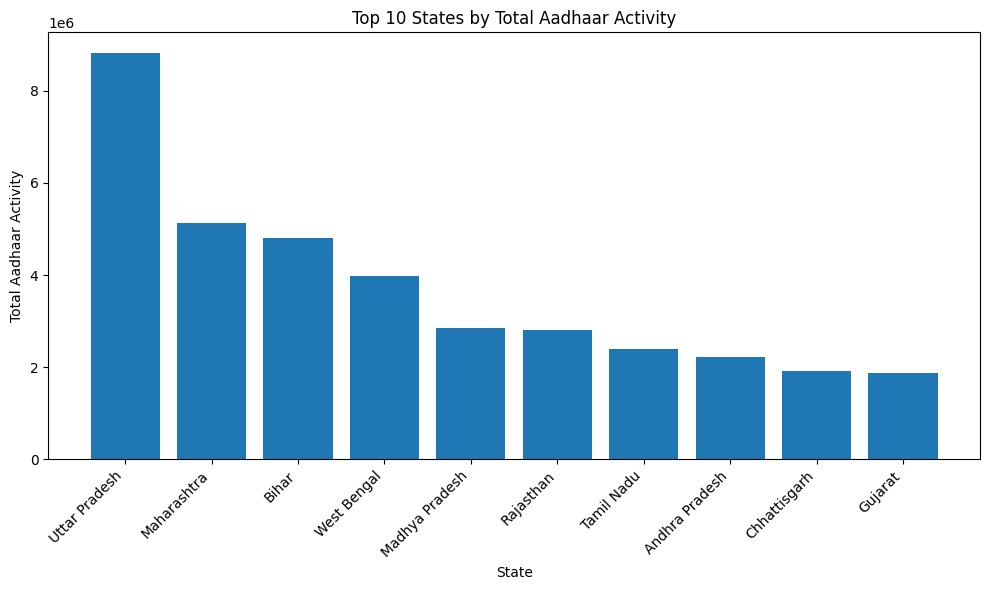

In [46]:
import matplotlib.pyplot as plt

top_states = state_activity.sort_values(
    "total_activity", ascending=False
).head(10)

plt.figure(figsize=(10,6))
plt.bar(top_states["state"], top_states["total_activity"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("State")
plt.ylabel("Total Aadhaar Activity")
plt.title("Top 10 States by Total Aadhaar Activity")
plt.tight_layout()
plt.show()


Observation:
States such as Uttar Pradesh, Maharashtra, and Madhya Pradesh show the highest Aadhaar activity.

Interpretation:
Higher activity largely reflects population size and administrative scale rather than higher per-capita engagement.

Implication:
Absolute counts should be complemented with percentage-based analysis to assess demographic balance.

In [47]:
state_activity = (
    df.groupby("state")[["demo_age_5_17", "demo_age_17_"]]
    .sum()
    .reset_index()
)

# Total Aadhaar activity
state_activity["total_activity"] = (
    state_activity["demo_age_5_17"] + state_activity["demo_age_17_"]
)

state_activity.head()


,state,demo_age_5_17,demo_age_17_,total_activity
0,Andaman And Nicobar Islands,559,6266,6825
1,Andhra Pradesh,287629,1925369,2212998
2,Arunachal Pradesh,5373,29384,34757
3,Assam,79582,924788,1004370
4,Bihar,331766,4464474,4796240


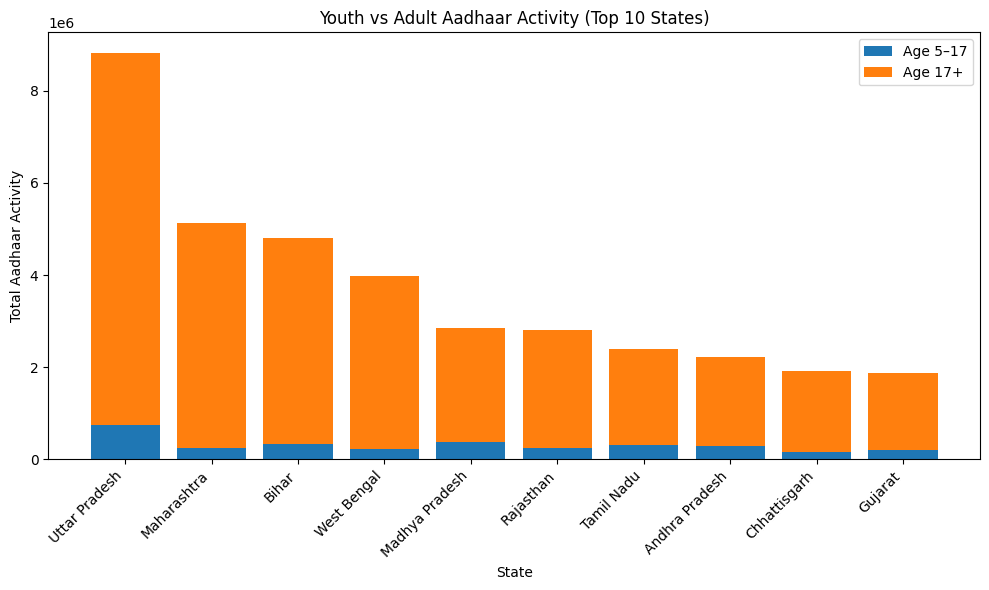

In [48]:
import matplotlib.pyplot as plt

top_states = (
    state_activity
    .sort_values("total_activity", ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))

plt.bar(
    top_states["state"],
    top_states["demo_age_5_17"],
    label="Age 5–17"
)

plt.bar(
    top_states["state"],
    top_states["demo_age_17_"],
    bottom=top_states["demo_age_5_17"],
    label="Age 17+"
)

plt.xticks(rotation=45, ha="right")
plt.xlabel("State")
plt.ylabel("Total Aadhaar Activity")
plt.title("Youth vs Adult Aadhaar Activity (Top 10 States)")
plt.legend()
plt.tight_layout()
plt.show()


Observations:

Adult Aadhaar activity (17+) dominates across all major states.
Youth Aadhaar activity forms a smaller but consistent base.
States with high total activity show similar age-group patterns.

Interpretation:

Aadhaar usage is currently more update-driven among adults.
Youth activity mainly reflects enrollment rather than frequent updates.
Population-heavy states amplify adult activity volumes.

Implication:
Aadhaar service infrastructure must continue prioritizing adult update workflows.
Dedicated youth enrollment initiatives (schools, child services) can improve early-age coverage.

In [49]:
#for relative youth participation -converting into percentages
state_activity["youth_percentage"] = (
    state_activity["demo_age_5_17"] / state_activity["total_activity"]
) * 100


In [50]:
top_youth_states = (
    state_activity
    .sort_values("youth_percentage", ascending=False)
    .head(10)
)

top_youth_states[["state", "youth_percentage"]]


,state,youth_percentage
17,Ladakh,21.127485
2,Arunachal Pradesh,15.458757
5,Chandigarh,14.637896
15,Karnataka,14.546601
7,Dadra And Nagar Haveli And Daman And Diu,14.153658
13,Jammu And Kashmir,13.925691
31,Telangana,13.586631
19,Madhya Pradesh,13.446002
26,Puducherry,13.264219
21,Manipur,13.215031


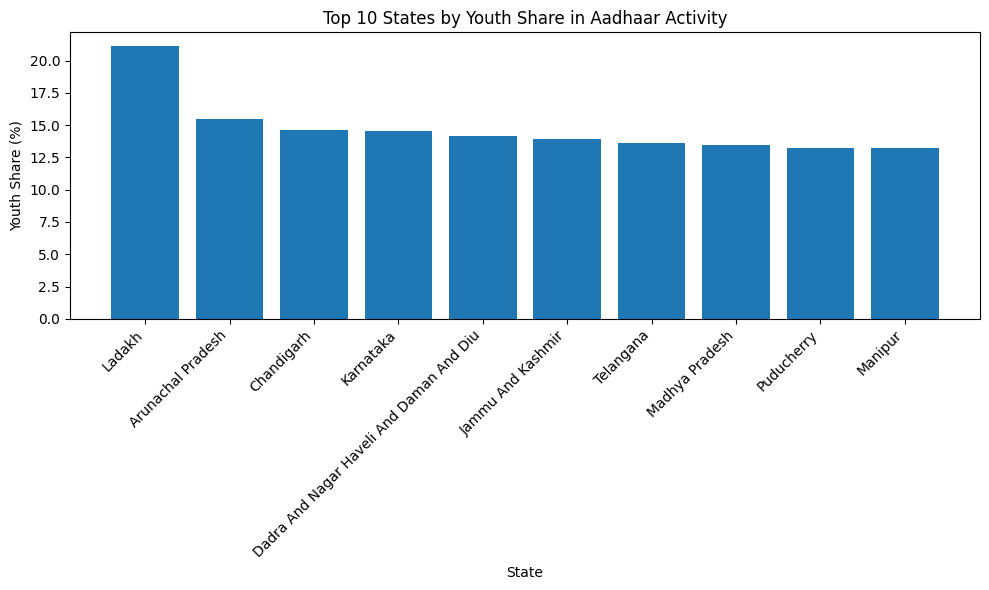

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(top_youth_states["state"], top_youth_states["youth_percentage"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("State")
plt.ylabel("Youth Share (%)")
plt.title("Top 10 States by Youth Share in Aadhaar Activity")
plt.tight_layout()
plt.show()


Observation:
Smaller states and Union Territories such as Ladakh, Puducherry, and Chandigarh show a higher percentage of youth Aadhaar activity.
Some larger states like Karnataka and Tamil Nadu also demonstrate relatively strong youth participation.
High-population states do not necessarily lead in youth share.

In [63]:
df["district"].nunique()

968

In [64]:
df["district"].value_counts().head(40)


district
North 24 Parganas     14467
Pune                  14157
Barddhaman            14148
Thrissur              14134
East Godavari         13105
Ernakulam             11484
Karimnagar            11462
Hyderabad             11247
Bengaluru             11240
Palakkad              11218
Thiruvananthapuram    11125
Warangal              10985
Medak                 10463
Tirunelveli           10355
Hooghly               10167
Coimbatore            10153
West Godavari         10133
Vellore               10024
Nalgonda              10023
Kollam                 9961
Guntur                 9860
Kottayam               9776
Krishna                9651
Kancheepuram           9507
Malappuram             9507
Alappuzha              9460
Ganjam                 9392
Bangalore              9383
Belgaum                9242
Thanjavur              9228
Chittoor               9184
Murshidabad            9164
Belagavi               9136
K.V. Rangareddy        9030
Mumbai                 9030
Khammam    

In [65]:
df["district"].sample(20, random_state=42)

44465                 Sivaganga
30804                   Shimoga
1887773                 Solapur
36667                Samastipur
1908242                 Birbhum
875115                   Bhopal
185422                 Adilabad
234019               Chandigarh
1977646                Vaishali
539316                  Kannauj
712686                  Birbhum
723244                 Varanasi
1532332                Puruliya
1487254                 Chennai
693129           Uttara Kannada
663287                    Churu
1621669                Vadodara
1560667    Parvathipuram Manyam
2206361               Bhavnagar
854309               Coimbatore
Name: district, dtype: object

In [67]:
#Numeric districts
df[df["district"].str.isnumeric() == True]["district"].value_counts()


district
561203    1
Name: count, dtype: int64

In [68]:
#Very short names
df[df["district"].str.len() < 3]["district"].value_counts()


Series([], Name: count, dtype: int64)

In [69]:
df["district"].astype(str).str.lower().unique()[:50]


array(['murshidabad', 'thoubal', 'sirohi', 'hooghly', 'una', 'sangareddy',
       'kannur', 'jaipur', 'varanasi', 'budaun', 'tikamgarh', 'fatehpur',
       'supaul', 'ramanagar', 'thiruvananthapuram', 'mandsaur',
       'pilibhit', 'buldhana', 'fatehgarh sahib', 'ratlam', 'gandhinagar',
       'samastipur', 'indore', 'gwalior', 'kollam', 'siwan', 'goalpara',
       'yamuna nagar', 'tiruvannamalai', 'nirmal', 'rajkot', 'kachchh',
       'mayurbhanj', 'papum pare', 'jalandhar', 'n. t. r', 'nalbari',
       'nashik', 'palghar', 'vizianagaram', 'dharwad', 'almora',
       'jaisalmer', 'nagpur', 'kalaburagi', 'kolkata', 'nagaur', 'kolar',
       'tiruvallur', 'puri'], dtype=object)

In [70]:
df["district"].value_counts().head(100)


district
North 24 Parganas    14467
Pune                 14157
Barddhaman           14148
Thrissur             14134
East Godavari        13105
                     ...  
Vizianagaram          5918
Jalgaon               5822
Sangli                5800
Tiruppur              5762
Mysuru                5615
Name: count, Length: 100, dtype: int64

In [71]:
#Preserve original district
df['district_raw']=df['district']

In [72]:
#To make same district names comparable, even if written differently.
import re
import pandas as pd

def normalize_text(x):
    if pd.isna(x):
        return x
    x = x.lower().strip()
    x = re.sub(r'[^a-z0-9\s]', ' ', x)   # remove symbols
    x = re.sub(r'\s+', ' ', x)          # normalize spaces
    return x

df['district_norm'] = df['district_raw'].apply(normalize_text)


In [73]:
df[["district_raw", "district_norm"]].sample(20, random_state=42)


,district_raw,district_norm
44465,Sivaganga,sivaganga
30804,Shimoga,shimoga
1887773,Solapur,solapur
36667,Samastipur,samastipur
1908242,Birbhum,birbhum
875115,Bhopal,bhopal
185422,Adilabad,adilabad
234019,Chandigarh,chandigarh
1977646,Vaishali,vaishali
539316,Kannauj,kannauj


In [74]:
#To detect duplicates that look different but mean the same thing
def district_key(x):
    if pd.isna(x):
        return x
    x = x.lower().strip()
    x = re.sub(r'[^a-z0-9]', '', x)
    return x

df['district_key'] = df['district_norm'].apply(district_key)


In [75]:
dup_districts = (
    df.groupby('district_key')['district_raw']
      .nunique()
      .sort_values(ascending=False)
)

dup_districts[dup_districts > 1].head(30)


district_key
medchalmalkajgiri    4
janjgirchampa        3
jajapur              2
gondiya              2
barabanki            2
khordha              2
chitrakoot           2
hingoli              2
chamarajanagar       2
karimnagar           2
jyotibaphulenagar    2
garhwa               2
banaskantha          2
bagalkot             2
kaimurbhabua         2
baghpat              2
haveri               2
chandauli            2
harda                2
gadag                2
kushinagar           2
kvrangareddy         2
mahabubnagar         2
dhalai               2
mumbaisuburban       2
nandurbar            2
pakaur               2
panchmahals          2
raebareli            2
sabarkantha          2
Name: district_raw, dtype: int64

In [76]:
DISTRICT_ALIAS_MAP = {
    # Karnataka
    'bangalore': 'Bengaluru',
    'belgaum': 'Belagavi',
    'shimoga': 'Shivamogga',
    'mysore': 'Mysuru',

    # West Bengal
    'hugli': 'Hooghly',

    # Tamil Nadu
    'tuticorin': 'Thoothukkudi',

    # Andhra Pradesh / Telangana
    'ysr': 'Y.S.R. Kadapa',
    'y s r': 'Y.S.R. Kadapa',
    'cuddapah': 'Y.S.R. Kadapa',
    'k v rangareddy': 'K.V. Rangareddy',

    # Uttar Pradesh
    'allahabad': 'Prayagraj',

    # MP / Maharashtra
    'ahmed nagar': 'Ahilyanagar',
    'hoshangabad': 'Narmadapuram',
}


In [77]:
df['district_clean'] = (
    df['district_norm']
      .replace(DISTRICT_ALIAS_MAP)
      .str.title()
)


In [78]:
DISTRICT_MERGE_MAP = {
    'West Medinipur': 'Paschim Medinipur',
    'West Midnapore': 'Paschim Medinipur',
    'East Midnapore': 'Purba Medinipur',
    'East Medinipur': 'Purba Medinipur',

    'Anantapur': 'Ananthapuramu',
    'Ananthapur': 'Ananthapuramu',
}


In [79]:
df['district_clean'] = df['district_clean'].replace(DISTRICT_MERGE_MAP)


In [80]:
df['district_clean'].nunique()

946

In [81]:
invalid = ['', 'East', 'West', 'North', 'South', 'North East']
df.loc[df['district_clean'].isin(invalid), 'district_clean'] = None


In [82]:
df['district_clean'].nunique()

941

In [83]:
df.drop(columns=['district', 'district_norm', 'district_key'], inplace=True)
df.rename(columns={'district_clean': 'district'}, inplace=True)


In [84]:
print("Unique districts after cleaning:", df['district'].nunique())
df['district'].value_counts().head(50)


Unique districts after cleaning: 941


district
Ananthapuramu         21865
Bengaluru             20623
Belagavi              18378
North 24 Parganas     14467
Pune                  14157
Barddhaman            14148
Thrissur              14134
Purba Medinipur       14017
East Godavari         13105
Paschim Medinipur     12015
Ernakulam             11484
Karimnagar            11462
Hooghly               11252
Hyderabad             11247
Palakkad              11218
Thiruvananthapuram    11125
Y.S.R. Kadapa         11070
Warangal              10985
Mysuru                10629
Medak                 10463
Tirunelveli           10355
Coimbatore            10153
West Godavari         10133
Vellore               10024
Nalgonda              10023
Kollam                 9961
Guntur                 9860
Kottayam               9776
Krishna                9651
K.V. Rangareddy        9550
Malappuram             9507
Kancheepuram           9507
Alappuzha              9460
Ganjam                 9392
Thanjavur              9228
Chittoor   

In [85]:
df['district'].unique()

array(['Murshidabad', 'Thoubal', 'Sirohi', 'Hooghly', 'Una', 'Sangareddy',
       'Kannur', 'Jaipur', 'Varanasi', 'Budaun', 'Tikamgarh', 'Fatehpur',
       'Supaul', 'Ramanagar', 'Thiruvananthapuram', 'Mandsaur',
       'Pilibhit', 'Buldhana', 'Fatehgarh Sahib', 'Ratlam', 'Gandhinagar',
       'Samastipur', 'Indore', 'Gwalior', 'Kollam', 'Siwan', 'Goalpara',
       'Yamuna Nagar', 'Tiruvannamalai', 'Nirmal', 'Rajkot', 'Kachchh',
       'Mayurbhanj', 'Papum Pare', 'Jalandhar', 'N T R', 'Nalbari',
       'Nashik', 'Palghar', 'Vizianagaram', 'Dharwad', 'Almora',
       'Jaisalmer', 'Nagpur', 'Kalaburagi', 'Kolkata', 'Nagaur', 'Kolar',
       'Tiruvallur', 'Puri', 'Deoria', 'Agar Malwa', 'Belagavi',
       'Navsari', 'Mamit', 'Hanumakonda', 'Jodhpur', 'Balaghat', 'Sikar',
       'Udham Singh Nagar', 'Bara Banki', 'Nadia', 'Nalanda',
       'Perambalur', 'Harda', 'Panchmahals', 'Thanjavur', 'Tumkur',
       'Rajanna Sircilla', 'Ganjam', 'Ananthapuramu', 'Rangareddi',
       'Y.S.R. Kadapa',

In [86]:
# 1. Strip spaces
df['district'] = df['district'].str.strip()


In [88]:
df['district'].nunique()

918

In [90]:
SPELLING_FIX_MAP = {
    # Trailing / spacing issues
    'Gondiya ': 'Gondiya',
    'Harda ': 'Harda',
    'Hingoli ': 'Hingoli',
    'Washim ': 'Washim',
    'Udupi ': 'Udupi',
    'Bagalkot ': 'Bagalkot',
    'Garhwa ': 'Garhwa',
    'Dhalai ': 'Dhalai',

    # Known spelling variants
    'Gondia': 'Gondiya',
    'Purnea': 'Purnia',
    'Barddhaman': 'Bardhaman',
    'Burdwan': 'Bardhaman',
    'Hooghiy': 'Hooghly',
    'Haora': 'Howrah',
    'Darjiling': 'Darjeeling',
    'Ahmadabad': 'Ahmedabad',
    'Rangareddi': 'Rangareddy',

    # West Bengal specifics
    'Koch Bihar': 'Cooch Behar',
    'Maldah': 'Malda',

    # Medinipur variants (already mostly handled, but safe)
    'West Medinipore': 'Paschim Medinipur',
    'East Midnapore': 'Purba Medinipur',

    # UP legacy names
    'Raebareli': 'Rae Bareli',

    # Telangana / AP
    'Karim Nagar': 'Karimnagar',
    'Mahabub Nagar': 'Mahabubnagar',

    # Minor punctuation drift
    'N T R': 'N.T.R',
}
#apply spelling fixes
df['district']=df['district'].replace(SPELLING_FIX_MAP)


In [91]:
df['district'].nunique()

905

In [92]:
#since , the same pincode appears with different district names 
pincode_district_map = (
    df.dropna(subset=['pincode', 'district'])  # remove rows missing pincode or district
      .groupby('pincode')['district']  # group all rows by pincode
      .agg(lambda x: x.value_counts().idxmax())  # choose the MOST FREQUENT district name
      .to_dict()  # convert to dictionary
)

len(pincode_district_map)


19769

For each pincode:
   -> Look at all district names used
   -> Count how many times each appears
   -> Pick the most common one
   -> Assume that is the correct district


In [93]:
# Apply mapping to correct districts
df['district_final'] = df.apply(
    lambda r: pincode_district_map.get(r['pincode'], r['district']),
    axis=1
)


In [94]:
df['district'] = df['district_final']
df.drop(columns=['district_final'], inplace=True)


In [95]:
df[df['district'].astype(str).str.isnumeric()]['district'].value_counts()


Series([], Name: count, dtype: int64)

In [96]:
junk_patterns = [
    'hospital', 'road', 'bank', 'near', 'behind',
    'colony', 'nagar', 'sector', 'market'
]

df[df['district'].str.lower().str.contains('|'.join(junk_patterns), na=False)][
    'district'
].value_counts().head(20)


district
Mahabubnagar                  19689
Karimnagar                    18138
Ahmadnagar                    10754
Bankura                        6485
Vizianagaram                   6228
Virudhunagar                   5205
Kanpur Nagar                   4542
Bara Banki                     4512
Jamnagar                       4491
Bhavnagar                      4170
Sas Nagar Mohali               3981
Shaheed Bhagat Singh Nagar     3545
Gandhinagar                    3448
Surendra Nagar                 3305
Ramanagar                      3134
Ambedkar Nagar                 2824
Srinagar                       2725
Sant Ravidas Nagar             2687
Vijayanagara                   2672
Ganganagar                     2653
Name: count, dtype: int64

In [97]:
FINAL_SPELLING_FIX = {
    'Bellary': 'Ballari',
    'Tumkur': 'Tumakuru',
    'Gondia': 'Gondiya',
    'Barddhaman': 'Bardhaman',
    'Burdwan': 'Bardhaman',
    'Hooghiy': 'Hooghly',
    'Haora': 'Howrah',
}

df['district'] = df['district'].replace(FINAL_SPELLING_FIX)


In [163]:
df['district'].nunique()

784

In [165]:
district_state_check = (
    df.groupby(['district', 'state'])
      .size()
      .reset_index(name='count')
)

district_state_check.sort_values('count', ascending=False).head(20)


,district,state,count
74,Bardhaman,West Bengal,29595
27,Ananthapuramu,Andhra Pradesh,25640
89,Bengaluru,Karnataka,21312
548,North 24 Parganas,West Bengal,19511
87,Belagavi,Karnataka,18376
217,East Godavari,Andhra Pradesh,15629
813,Warangal,Telangana,15614
604,Purba Medinipur,West Bengal,14751
603,Pune,Maharashtra,14210
760,Thrissur,Kerala,14168


In [167]:
district_state_counts = (
    district_state_check
    .groupby('district')['state']
    .nunique()
    .reset_index(name='state_count')
)

conflicting_districts = district_state_counts[
    district_state_counts['state_count'] > 1
]['district']

len(conflicting_districts)


55

In [169]:
district_state_check[
    district_state_check['district'].isin(conflicting_districts)
].sort_values(['district', 'count'], ascending=[True, False]).head(30)


,district,state,count
1,Adilabad,Telangana,7751
0,Adilabad,Andhra Pradesh,3917
14,Alluri Sitharama Raju,Andhra Pradesh,2571
15,Alluri Sitharama Raju,Telangana,34
41,Aurangabad,Maharashtra,6730
40,Aurangabad,Bihar,2908
54,Baleswar,Odisha,4086
55,Baleswar,West Bengal,36
61,Balrampur,Uttar Pradesh,1603
60,Balrampur,Chhattisgarh,1209


In [171]:
pincode_state_map = (
    df.dropna(subset=['pincode', 'state'])
      .groupby('pincode')['state']
      .agg(lambda x: x.value_counts().idxmax())
      .to_dict()
)


In [177]:
def resolve_district_state(district_name):
    # All pincodes used with this district
    pincodes = (
        df.loc[df['district'] == district_name, 'pincode']
          .dropna()
          .unique()
    )

    # Map those pincodes to states
    pincode_states = [
        pincode_state_map[p]
        for p in pincodes
        if p in pincode_state_map
    ]

    # If we have pincode-based evidence → trust it
    if len(pincode_states) > 0:
        return (
            pd.Series(pincode_states)
              .value_counts()
              .idxmax()
        )

    # Fallback: majority state in data
    return (
        district_state_check[
            district_state_check['district'] == district_name
        ]
        .sort_values('count', ascending=False)
        .iloc[0]['state']
    )


In [179]:
final_district_state_map = {}

# First add clean districts
clean_districts = district_state_counts[
    district_state_counts['state_count'] == 1
]['district']

for d in clean_districts:
    final_district_state_map[d] = (
        district_state_check[
            district_state_check['district'] == d
        ].iloc[0]['state']
    )

# Now resolve conflicts
for d in conflicting_districts:
    correct_state = resolve_district_state(d)
    final_district_state_map[d] = correct_state
    print(f"Resolved: {d} → {correct_state}")


Resolved: Adilabad → Telangana
Resolved: Alluri Sitharama Raju → Andhra Pradesh
Resolved: Aurangabad → Maharashtra
Resolved: Baleswar → Odisha
Resolved: Balrampur → Uttar Pradesh
Resolved: Bhadradri Kothagudem → Telangana
Resolved: Bijapur → Karnataka
Resolved: Bijnor → Uttar Pradesh
Resolved: Bilaspur → Himachal Pradesh
Resolved: Chandigarh → Chandigarh
Resolved: Chittoor → Andhra Pradesh
Resolved: Dadra And Nagar Haveli → Dadra And Nagar Haveli And Daman And Diu
Resolved: Daman → Dadra And Nagar Haveli And Daman And Diu
Resolved: East Sikkim → Sikkim
Resolved: Goalpara → Assam
Resolved: Hamirpur → Himachal Pradesh
Resolved: Hanumakonda → Telangana
Resolved: Haridwar → Uttarakhand
Resolved: Hyderabad → Telangana
Resolved: Jagitial → Telangana
Resolved: K.V. Rangareddy → Telangana
Resolved: Kamareddy → Telangana
Resolved: Kamrup → Assam
Resolved: Kannur → Kerala
Resolved: Karaikal → Puducherry
Resolved: Kargil → Jammu And Kashmir
Resolved: Karimnagar → Telangana
Resolved: Khammam → Tel

In [181]:
df['state_corrected'] = df['district'].map(final_district_state_map)


In [183]:
df['state'] = df['state_corrected']
df.drop(columns=['state_corrected'], inplace=True)


In [185]:
df.groupby('district')['state'].nunique().value_counts()


state
1    784
Name: count, dtype: int64

In [187]:
df[df['district'].isin([
    'Adilabad', 'Hyderabad', 'Mahabubnagar',
    'Aurangabad', 'Bilaspur'
])][['district','state']].drop_duplicates()


,district,state
29,Adilabad,Telangana
134,Aurangabad,Maharashtra
332,Hyderabad,Telangana
429,Mahabubnagar,Telangana
442,Bilaspur,Himachal Pradesh


In [197]:
df['district'].unique()

array(['Murshidabad', 'Kakching', 'Sirohi', 'Hooghly', 'Una', 'Medak',
       'Kannur', 'Jaipur', 'Varanasi', 'Budaun', 'Tikamgarh', 'Fatehpur',
       'Supaul', 'Ramanagar', 'Thiruvananthapuram', 'Mandsaur',
       'Pilibhit', 'Buldhana', 'Fatehgarh Sahib', 'Ratlam', 'Gandhinagar',
       'Samastipur', 'Indore', 'Gwalior', 'Kollam', 'Siwan', 'Goalpara',
       'Yamuna Nagar', 'Tiruvannamalai', 'Adilabad', 'Rajkot', 'Kachchh',
       'Mayurbhanj', 'Papum Pare', 'Jalandhar', 'N.T.R', 'Nalbari',
       'Nashik', 'Thane', 'Vizianagaram', 'Dharwad', 'Almora', 'Jodhpur',
       'Nagpur', 'Kalaburagi', 'Kolkata', 'Nagaur', 'Kolar', 'Chennai',
       'Puri', 'Deoria', 'Agar Malwa', 'Belagavi', 'Navsari', 'Mamit',
       'Warangal', 'Balaghat', 'Sikar', 'Udham Singh Nagar', 'Bara Banki',
       'Nalanda', 'Perambalur', 'Harda', 'Panchmahals', 'Thanjavur',
       'Tumakuru', 'Karimnagar', 'Ganjam', 'Ananthapuramu',
       'K.V. Rangareddy', 'Y.S.R. Kadapa', 'Chengalpattu', 'Ahmedabad',
       '

In [191]:
df = df[df['district'].notna()]

In [193]:
df['district'].nunique()

784

In [199]:
df['month'] = (
    pd.to_datetime(df['date'], format='mixed', dayfirst=True, errors='coerce')
      .dt.to_period('M')
      .astype(str)
)


In [201]:
df[['date', 'month']].head(10)


,date,month
0,01-03-2025,2025-03
1,01-03-2025,2025-03
2,01-03-2025,2025-03
3,01-03-2025,2025-03
4,01-03-2025,2025-03
5,01-03-2025,2025-03
6,01-03-2025,2025-03
7,01-03-2025,2025-03
8,01-03-2025,2025-03
9,01-03-2025,2025-03


In [203]:
df['month'].isna().sum()


0

In [205]:
monthly_state_counts = (
    df.groupby(['month', 'state'])
      .size()
      .reset_index(name='count')
)


In [207]:
monthly_state_counts['month'] = pd.to_datetime(monthly_state_counts['month'])


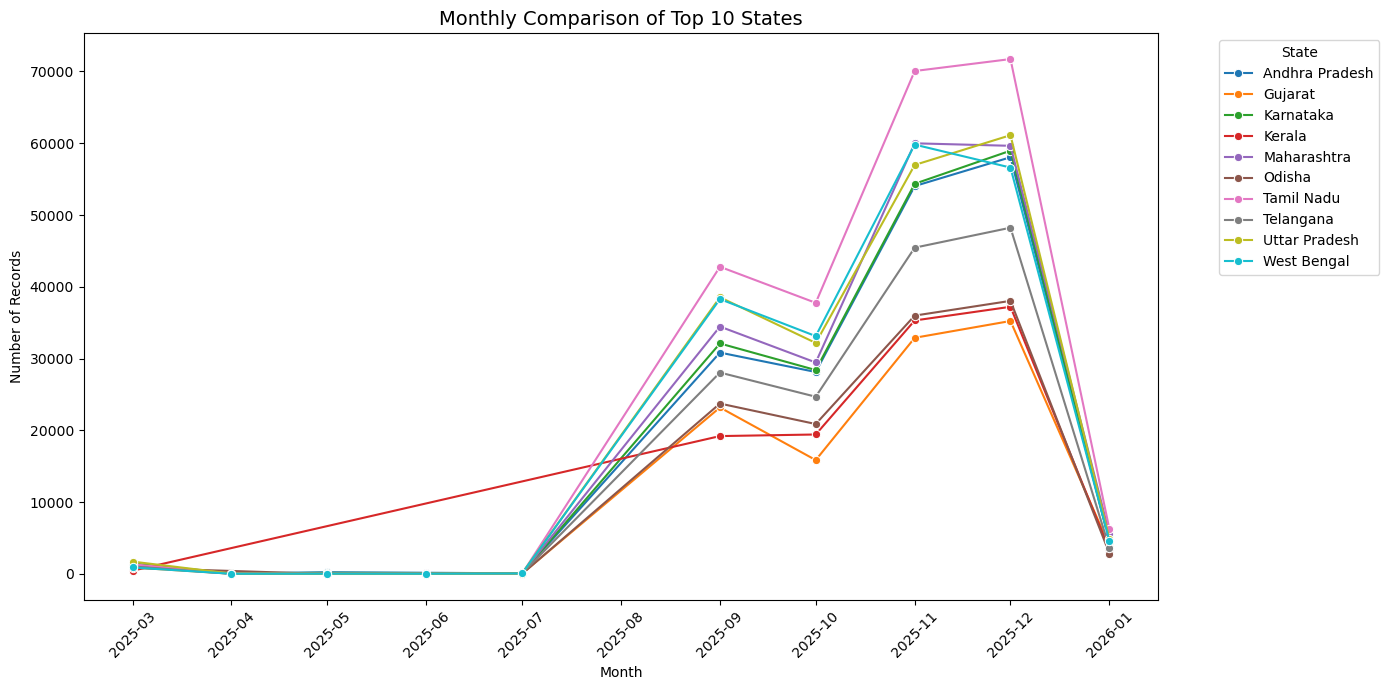

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pick top 10 states overall
top_states = (
    df['state']
    .value_counts()
    .head(10)
    .index
)

plot_df = monthly_state_counts[
    monthly_state_counts['state'].isin(top_states)
]

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=plot_df,
    x='month',
    y='count',
    hue='state',
    marker='o'
)

plt.title('Monthly Comparison of Top 10 States', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


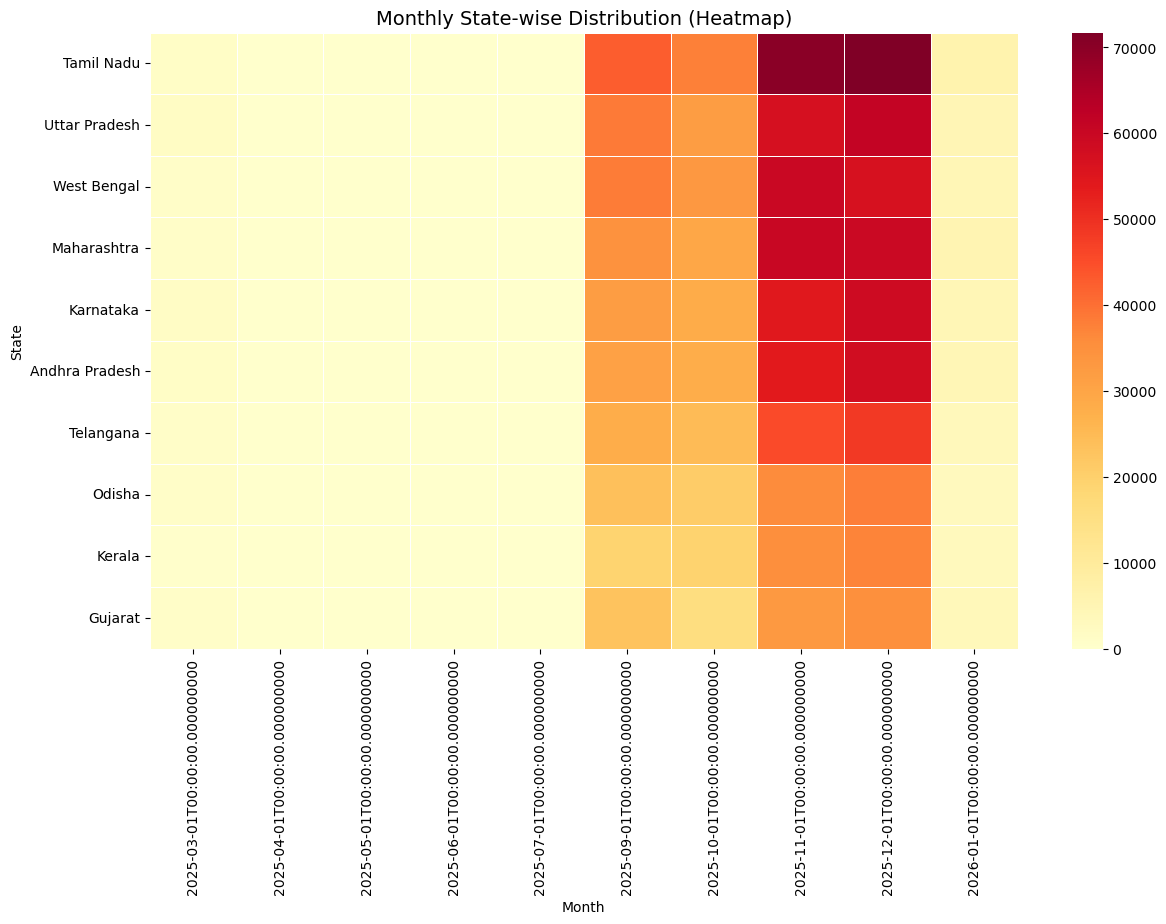

In [211]:
pivot_df = monthly_state_counts.pivot(
    index='state',
    columns='month',
    values='count'
).fillna(0)

# Limit to top 15 states for readability
pivot_df = pivot_df.loc[top_states[:15]]

plt.figure(figsize=(14, 8))
sns.heatmap(
    pivot_df,
    cmap='YlOrRd',
    linewidths=0.5
)

plt.title('Monthly State-wise Distribution (Heatmap)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('State')
plt.show()


In [98]:
df

,date,state,pincode,demo_age_5_17,demo_age_17_,state_needs_correction,district_raw,district
0,01-03-2025,West Bengal,742402,15,165,False,Murshidabad,Murshidabad
1,01-03-2025,Manipur,795101,12,114,False,Thoubal,Kakching
2,01-03-2025,Rajasthan,307513,18,201,False,Sirohi,Sirohi
3,01-03-2025,West Bengal,712311,27,480,False,Hooghly,Hooghly
4,01-03-2025,Himachal Pradesh,174301,24,243,False,Una,Una
...,...,...,...,...,...,...,...,...
2375877,03-01-2026,West Bengal,721145,0,2,False,West Midnapore,Paschim Medinipur
2375878,03-01-2026,West Bengal,721149,0,1,False,West Midnapore,Paschim Medinipur
2375879,03-01-2026,West Bengal,721212,0,5,False,West Midnapore,Paschim Medinipur
2375880,03-01-2026,West Bengal,721242,0,6,False,West Midnapore,Paschim Medinipur


In [99]:
df.columns

Index(['date', 'state', 'pincode', 'demo_age_5_17', 'demo_age_17_',
       'state_needs_correction', 'district_raw', 'district'],
      dtype='object')

In [100]:
df['state'].nunique()

36

In [101]:
state_activity = (
    df.groupby("state")[["demo_age_5_17", "demo_age_17_"]]
    .sum()
    .reset_index()
)

# Total Aadhaar activity
state_activity["total_activity"] = (
    state_activity["demo_age_5_17"] + state_activity["demo_age_17_"]
)

state_activity.sort_values("total_activity", ascending=False).head(10)


,state,demo_age_5_17,demo_age_17_,total_activity
33,Uttar Pradesh,738448,8088103,8826551
20,Maharashtra,254472,4869985,5124457
4,Bihar,331766,4464474,4796240
35,West Bengal,216432,3758943,3975375
19,Madhya Pradesh,384548,2475395,2859943
28,Rajasthan,243006,2568503,2811509
30,Tamil Nadu,315658,2087457,2403115
1,Andhra Pradesh,287629,1925369,2212998
6,Chhattisgarh,159290,1764413,1923703
10,Gujarat,199257,1675694,1874951


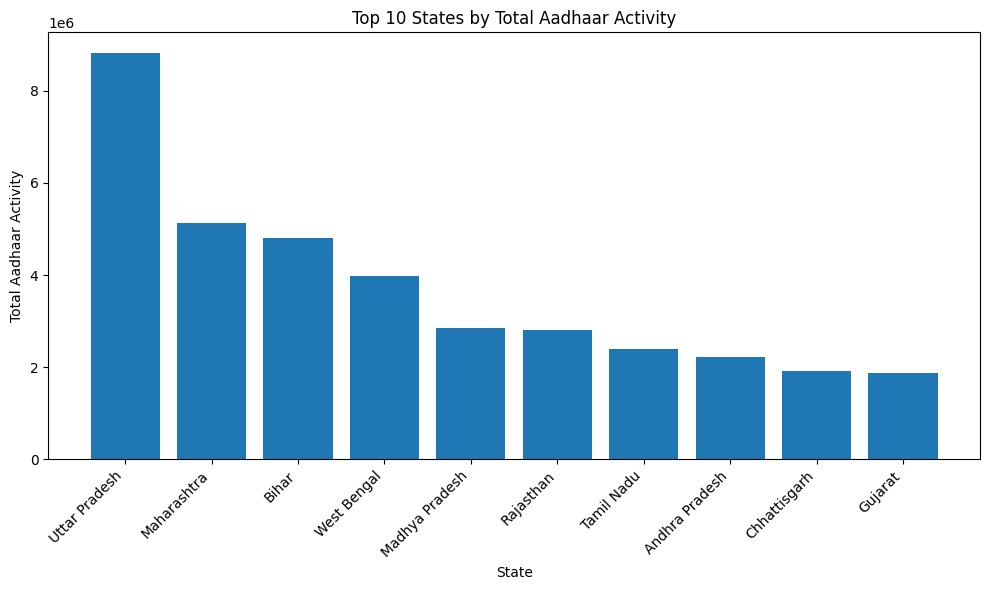

In [102]:
import matplotlib.pyplot as plt

top_states = state_activity.sort_values(
    "total_activity", ascending=False
).head(10)

plt.figure(figsize=(10,6))
plt.bar(top_states["state"], top_states["total_activity"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("State")
plt.ylabel("Total Aadhaar Activity")
plt.title("Top 10 States by Total Aadhaar Activity")
plt.tight_layout()
plt.show()


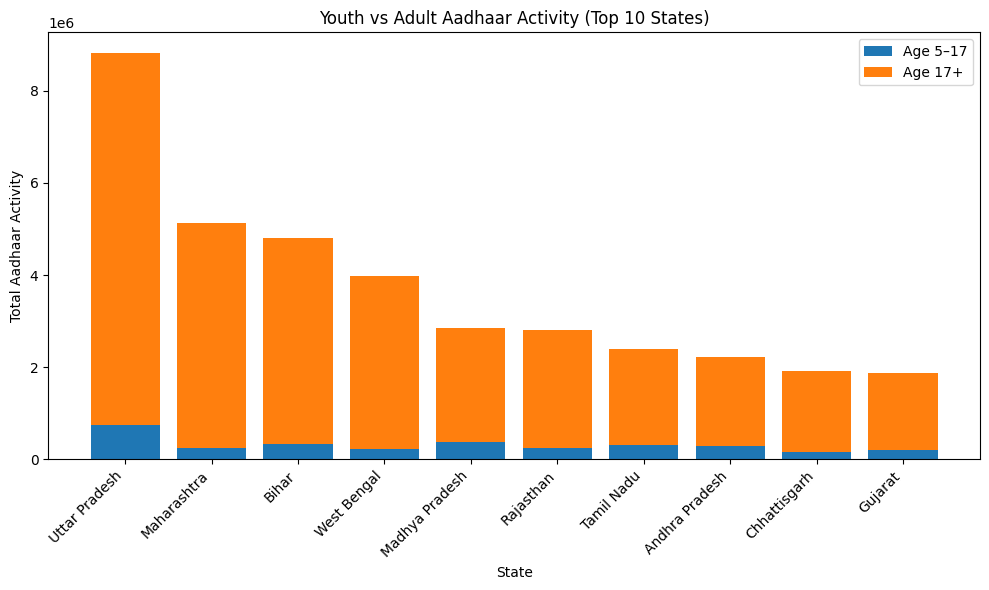

In [103]:
import matplotlib.pyplot as plt

top_states = (
    state_activity
    .sort_values("total_activity", ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))

plt.bar(
    top_states["state"],
    top_states["demo_age_5_17"],
    label="Age 5–17"
)

plt.bar(
    top_states["state"],
    top_states["demo_age_17_"],
    bottom=top_states["demo_age_5_17"],
    label="Age 17+"
)

plt.xticks(rotation=45, ha="right")
plt.xlabel("State")
plt.ylabel("Total Aadhaar Activity")
plt.title("Youth vs Adult Aadhaar Activity (Top 10 States)")
plt.legend()
plt.tight_layout()
plt.show()
